In [2]:
# Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
sns.set_style("whitegrid")
sns.set(font_scale=1.3)

In [3]:
# Loading the data
DataFrame=pd.read_excel("E:\\Gladys\\DataScienceProjects\\LinearRegression\\Google adsense.xls")

In [4]:
# First five rows of the data
DataFrame.head()

,Date,Earnings($),Page views,Page RPM($),Impressions,Impression RPM($),Active view Viewable(%),Clicks
0,2022-01-01 00:00:00,0.14,187,0.76,747,0.19,64.3900,5
1,2022-02-01 00:00:00,0.08,348,0.22,1467,0.05,0.6019,3
2,2022-03-01 00:00:00,0.28,546,0.52,2246,0.13,0.5715,9
3,2022-04-01 00:00:00,0.30,539,0.56,2293,0.13,0.5830,7
4,2022-05-01 00:00:00,0.29,549,0.53,2115,0.14,0.5786,10


In [5]:
# Number of rows and columns
DataFrame.shape

(200, 8)

In [6]:
# Overall information about the data
DataFrame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Date                     200 non-null    object 
 1   Earnings($)              200 non-null    float64
 2   Page views               200 non-null    int64  
 3   Page RPM($)              200 non-null    float64
 4   Impressions              200 non-null    int64  
 5   Impression RPM($)        200 non-null    float64
 6   Active view Viewable(%)  200 non-null    float64
 7   Clicks                   200 non-null    int64  
dtypes: float64(4), int64(3), object(1)
memory usage: 12.6+ KB


In [8]:
# Names of the columns
DataFrame.columns

Index(['Date', 'Earnings($)', 'Page views', 'Page RPM($)', 'Impressions',
       'Impression RPM($)', 'Active view Viewable(%)', 'Clicks'],
      dtype='object')

In [7]:
# Data types of the columns
DataFrame.dtypes

Date                        object
Earnings($)                float64
Page views                   int64
Page RPM($)                float64
Impressions                  int64
Impression RPM($)          float64
Active view Viewable(%)    float64
Clicks                       int64
dtype: object

In [19]:
# Statistically describing the data
DataFrame.describe()

,Earnings($),Page views,Page RPM($),Impressions,Impression RPM($),Active view Viewable(%),Clicks
count,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.00000
mean,0.284250,787.350000,0.392250,3093.050000,0.098200,0.891908,12.08000
std,0.176329,369.472458,0.235557,1407.604068,0.058118,4.512613,6.80774
min,0.030000,147.000000,0.080000,541.000000,0.020000,0.505100,1.00000
25%,0.170000,447.750000,0.237500,1951.000000,0.060000,0.558750,6.00000
50%,0.250000,754.000000,0.330000,3033.000000,0.080000,0.574600,11.00000
75%,0.350000,1110.500000,0.490000,4034.250000,0.120000,0.589275,17.00000
max,1.040000,1651.000000,1.960000,7636.000000,0.480000,64.390000,34.00000


In [10]:
# Number of null values in the columns
DataFrame.isnull().sum()

Date                       0
Earnings($)                0
Page views                 0
Page RPM($)                0
Impressions                0
Impression RPM($)          0
Active view Viewable(%)    0
Clicks                     0
dtype: int64

## 1) Univariate Analysis

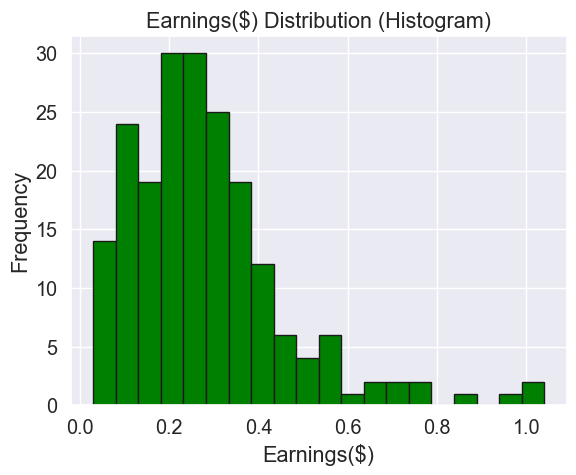

<Figure size 10x10 with 0 Axes>

In [10]:
# Histogram
plt.hist(DataFrame["Earnings($)"], bins=20, edgecolor="k",color="green")
plt.xlabel("Earnings($)")
plt.ylabel("Frequency")
plt.title("Earnings($) Distribution (Histogram)")
plt.figure(figsize=(.1,.1))
plt.show()


<Axes: xlabel='Page views', ylabel='Count'>

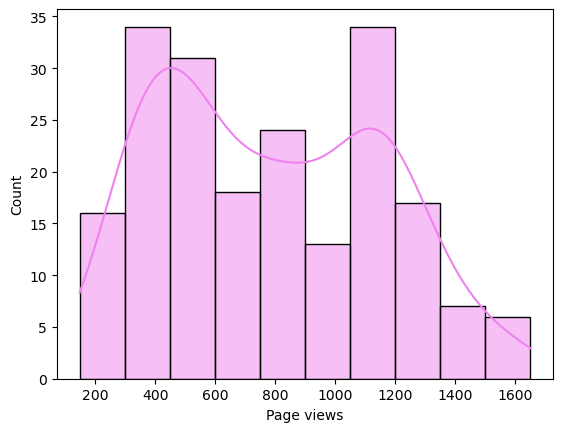

In [39]:
# Histplot
sns.histplot(DataFrame['Page views'], kde=True, bins=10,color="violet")

<Axes: xlabel='Clicks', ylabel='count'>

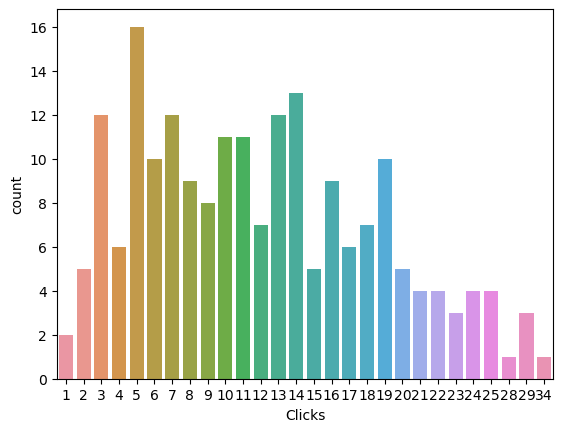

In [34]:
# Countplot
sns.countplot(x='Clicks', data=DataFrame)

## 2)Bivariate Analysis

Text(0.5, 1.0, 'Scatter Plot of Earnings($) vs. Clicks')

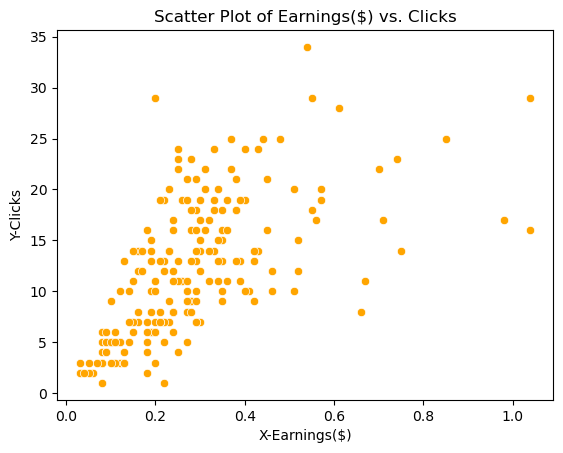

In [42]:
# Scatter Plot
sns.scatterplot(x='Earnings($)', y='Clicks', data=DataFrame, color='orange', marker='o')
plt.xlabel('X-Earnings($)')
plt.ylabel('Y-Clicks')
plt.title('Scatter Plot of Earnings($) vs. Clicks')

In [43]:
# Correlation coefficient
correlation = DataFrame['Earnings($)'].corr(DataFrame['Page views'])
print("Correlation Coefficient:", correlation)

Correlation Coefficient: 0.500135597262048


C:\Users\Gladys\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


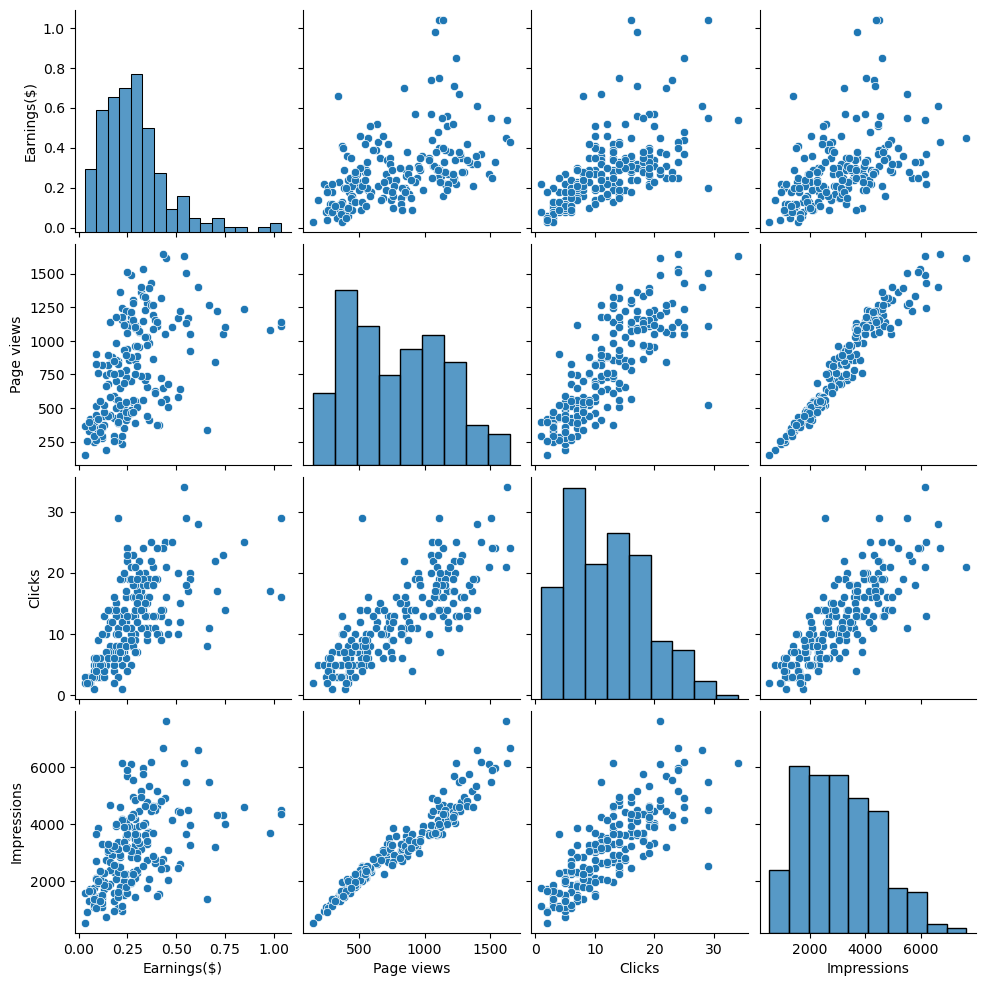

In [45]:
# Pairplot
sns.pairplot(DataFrame, vars=['Earnings($)', 'Page views', 'Clicks', 'Impressions'])

In [29]:
# Dropping date column
Data = DataFrame.drop("Date", axis=1)

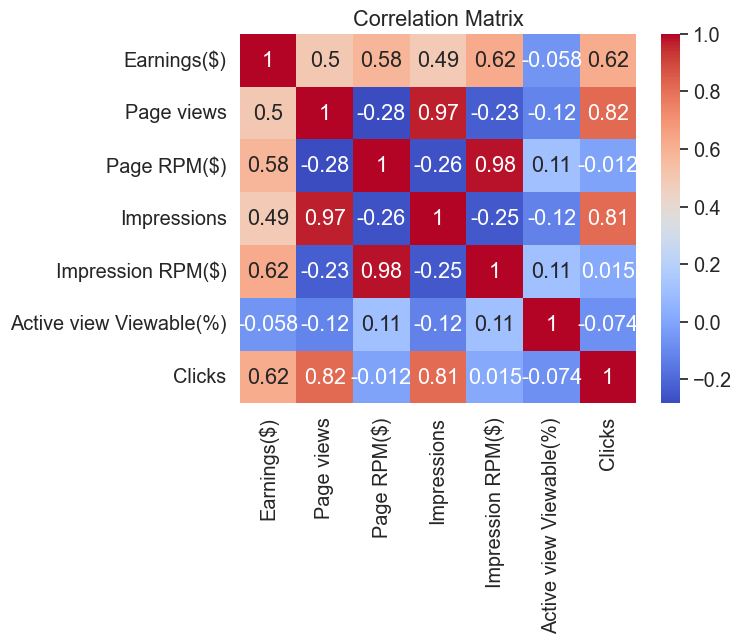

In [30]:
# Correlation matrix
correlation_matrix = Data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

In [31]:
Data.columns

Index(['Earnings($)', 'Page views', 'Page RPM($)', 'Impressions',
       'Impression RPM($)', 'Active view Viewable(%)', 'Clicks'],
      dtype='object')

In [33]:
# Preprocessing: Selecting features and target variable
X = Data[['Page views', 'Page RPM($)', 'Impressions',
       'Impression RPM($)', 'Active view Viewable(%)', 'Clicks']]
y = Data['Earnings($)']


In [34]:
# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4)

In [35]:
# Initialize and fit the standard scalar on the training data
from sklearn.preprocessing import StandardScaler
Scaler= StandardScaler()
X_train_scaled=Scaler.fit_transform(X_train)

# Transforming the testing data using the same scaler
X_test_scaled=Scaler.fit_transform(X_test)

In [36]:
# Building the Linear Regression Model
model = LinearRegression()

# Fitting the model on the training data
model.fit(X_train_scaled, y_train)

LinearRegression()

In [37]:
# Model Evaluation
y_pred = model.predict(X_test_scaled)

# Mean Squared Error and R-squared for model evaluation
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared:", r2)

Mean Squared Error: 0.006142803569468601
R-squared: 0.8614605727486375


MSE of 0.006142803569468601 suggests that, on average, the squared difference between the predicted values and actual values is very low, indicating good predictive accuracy.

In a regression model. R-squared values range from 0 to 1, where 1 indicates that all of the variance in the target variable is explained by the model, and 0 indicates that the model doesn't explain any variance.

In this case, an R-squared value of 0.8614605727486375 means that approximately 86.15% of the variance in the target variable is explained by the model, which is generally considered a good fit for the data.

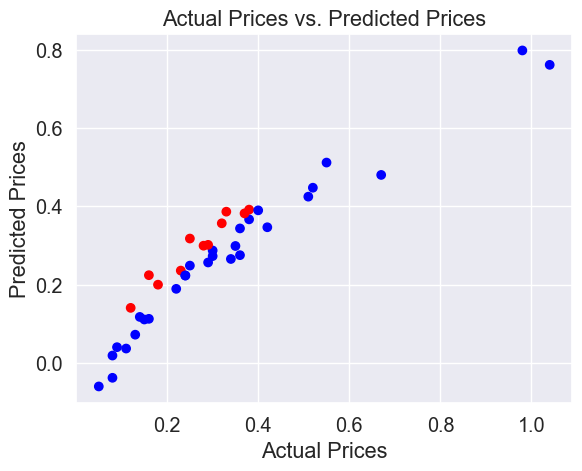

In [38]:
# Predictions and Visualization
# To visualize the predictions against actual prices, we'll use a scatter plot
colors=['blue' if actual>predicted else 'red' for actual, predicted in zip(y_test,y_pred)]
plt.scatter(y_test, y_pred,c=colors)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual Prices vs. Predicted Prices")

plt.show()

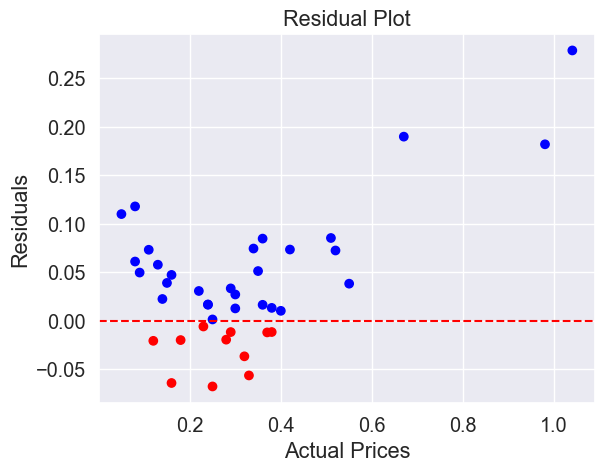

In [24]:
# We can also create a residual plot to check the model's performance

residuals = y_test - y_pred
plt.scatter(y_test, residuals,c=colors)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel("Actual Prices")
plt.ylabel("Residuals")
plt.title("Residual Plot")
colors=['green' if res>=0 else 'red' for res in residuals]
plt.show()

In [39]:
Data.columns

Index(['Earnings($)', 'Page views', 'Page RPM($)', 'Impressions',
       'Impression RPM($)', 'Active view Viewable(%)', 'Clicks'],
      dtype='object')

In [40]:
target=Data['Earnings($)']
features=Data.drop('Earnings($)',axis=1)

In [42]:
features.head()

,Page views,Page RPM($),Impressions,Impression RPM($),Active view Viewable(%),Clicks
0,187,0.76,747,0.19,64.3900,5
1,348,0.22,1467,0.05,0.6019,3
2,546,0.52,2246,0.13,0.5715,9
3,539,0.56,2293,0.13,0.5830,7
4,549,0.53,2115,0.14,0.5786,10


In [45]:
new_input=np.array([[300,2.0,250,1.5,90,70]])
predicted_earnings=model.predict(new_input)
print(f"predicted_earnings($):{predicted_earnings}")

predicted_earnings($):[24.3539338]
